In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import scipy.stats

In [3]:
# df.groupby(["is_arrested","driver_gender"])["id"].count()

In [6]:
def cramers_stat(df,col1,col2):  
    confusion_matrix = pd.crosstab(df[col1],df[col2])
    chi2 = scipy.stats.chi2_contingency(confusion_matrix,correction=False)[0]  
    n = confusion_matrix.sum().sum()  
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))  

In [7]:
def chi2testcols(df,col1,col2):
    contingency = pd.crosstab(df[col1],df[col2])
    return scipy.stats.chi2_contingency(contingency,correction=True)

# Police 

In [8]:
df = pd.read_csv("../data/police_stop/CT_police_stop.csv",index_col=0)

In [9]:
col_of_interest = "stop_outcome"
group_by = ["driver_gender", "driver_race", "search_conducted","contraband_found",  "duration","stop_time", "driver_age"]
df = df[group_by+[col_of_interest]]

In [13]:
import sklearn.metrics

In [17]:
sklearn.metrics.mutual_info_score(df[col],df[col_of_interest])

0.7651062778187037

In [ ]:
sklearn.metrics.mutual_info_score(df[col],df[col_of_interest])

In [19]:
df_data = []
for col in df.columns:
    if col!="id" and col!=col_of_interest and len(df[col].unique())>1:
        MI = sklearn.metrics.mutual_info_score(df[col],df[col_of_interest]) 
        df_data.append([col,MI])

In [21]:
df  = pd.DataFrame(df_data, columns=["attribute","MI"])
# df.to_csv("ct_police_ground_truth_correlation.csv")

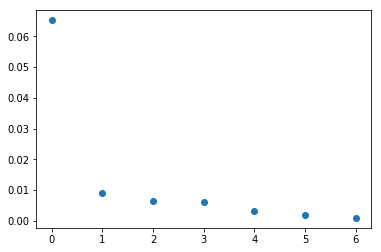

In [30]:
plt.plot(sorted(df["MI"],reverse=True),'o')

In [23]:
df["MI"].rank()

0    1.0
1    4.0
2    6.0
3    3.0
4    7.0
5    2.0
6    5.0
Name: MI, dtype: float64

In [25]:
pdf = pd.read_csv("ct_police_ground_truth_correlation.csv")

In [27]:
pdf["cramerV"].rank()

0    1.0
1    3.0
2    6.0
3    5.0
4    7.0
5    2.0
6    4.0
Name: cramerV, dtype: float64

In [ ]:
df_data = []
for col in df.columns:
    if col!="id" and col!=col_of_interest and len(df[col].unique())>1:
        chi2,p,dof,expected = chi2testcols(df,col_of_interest,col)
        cramerV=cramers_stat(df,col_of_interest,col)  
        if cramerV>0.2:
            print (col,chi2,p,cramerV, "--> V>0.2 (*possible correlation*)")
        else:
            print (col,chi2,p,cramerV)
        df_data.append([col,chi2,p,cramerV])

In [80]:
df  = pd.DataFrame(df_data, columns=["attribute","chi2","p","cramerV"])
df.to_csv("ct_police_ground_truth_correlation.csv")

In [81]:
df.sort("cramerV")

,attribute,chi2,p,cramerV
0,driver_gender,585.461822,7.388915e-128,0.043253
5,stop_time,1267.593042,1.121782e-270,0.045003
1,driver_race,3894.873678,0.000000e+00,0.078885
6,driver_age,4125.310845,0.000000e+00,0.081185
3,contraband_found,3914.130297,0.000000e+00,0.111836
2,search_conducted,11825.052627,0.000000e+00,0.194386
4,duration,75865.255588,0.000000e+00,0.348153


# Autism

In [31]:
df = pd.read_csv("../data/autism.csv")
df.columns = [col.lower() for col in df.columns]
col_of_interest = "autism"
group_by = ['a1_score', 'a2_score', 'a3_score', 'a4_score', 'a5_score', 'a6_score', 'a7_score', 'a8_score', 'a9_score', 'a10_score']
df = df[group_by+[col_of_interest]]

In [32]:
df_data = []
for col in df.columns:
    if col!="id" and col!=col_of_interest and len(df[col].unique())>1:
        MI = sklearn.metrics.mutual_info_score(df[col],df[col_of_interest]) 
        df_data.append([col,MI])

In [33]:
df  = pd.DataFrame(df_data, columns=["attribute","MI"])

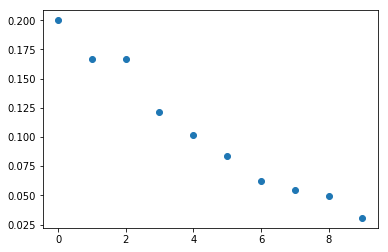

In [35]:
plt.plot(sorted(df["MI"],reverse=True),'o')

In [67]:
df_data = [] 
for col in df.columns:
    if col!="id" and col!=col_of_interest and len(df[col].unique())>1:
        chi2,p,dof,expected = chi2testcols(df,col_of_interest,col)
        cramerV=cramers_stat(df,col_of_interest,col)  
        if cramerV>0.5:
            print col,chi2,p,cramerV, "--> V>0.5 (*possible correlation*)"
        else:
            print col,chi2,p,cramerV
        df_data.append([col,chi2,p,cramerV])

a1_score 60.87247643017611 6.089427558513987e-15 0.2976276065855922
a2_score 66.8546435005204 2.9228294555857717e-16 0.31138172169940886
a3_score 134.96983999543073 3.3522248685530275e-31 0.44107371891685415
a4_score 153.36360959313063 3.1901210363590196e-35 0.46994518792403434
a5_score 200.598762461269 1.5458575800301928e-45 0.537004337601707 --> V>0.5 (*possible correlation*)
a6_score 243.84879108234452 5.6954030872241455e-55 0.592090951109315 --> V>0.5 (*possible correlation*)
a7_score 85.34491147637725 2.50606072500707e-20 0.35142862483818527
a8_score 38.483164230243275 5.522805841679005e-10 0.23716061128409585
a9_score 281.32886720198405 3.854919896502865e-63 0.6355758013010075 --> V>0.5 (*possible correlation*)
a10_score 103.09454313765482 3.1952998214220183e-24 0.3859170845042139


In [68]:
df  = pd.DataFrame(df_data, columns=["attribute","chi2","p","cramerV"])

- low chi2 corresponds to low p values for chi2 test and cramer's V
- ~~Rank function 1: since cramer's score is between [0,1] we can use the cramer's score for each attribute directly as the coefficient for weighting.~~

In [69]:
df.to_csv("autism_ground_truth_correlation.csv")

In [70]:
df.sort("cramerV")

,attribute,chi2,p,cramerV
7,a8_score,38.483164,5.522806e-10,0.237161
0,a1_score,60.872476,6.089428e-15,0.297628
1,a2_score,66.854644,2.922829e-16,0.311382
6,a7_score,85.344911,2.506061e-20,0.351429
9,a10_score,103.094543,3.195300e-24,0.385917
2,a3_score,134.969840,3.352225e-31,0.441074
3,a4_score,153.363610,3.190121e-35,0.469945
4,a5_score,200.598762,1.545858e-45,0.537004
5,a6_score,243.848791,5.695403e-55,0.592091
8,a9_score,281.328867,3.854920e-63,0.635576
